**Tugas ML**

- Nama  : Ammar Ghozy Tanumijaya
- NRP   : 5025231203

Link KAGGLE : https://www.kaggle.com/datasets/saurabhbadole/housing-price-data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**1. Menambahkan Dataset**

In [17]:
# Baca dataset dari Google Colab
file_path = "/content/Housing_Price_Data.csv"  # Sesuaikan path jika berbeda
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama
print("Preview Dataset:")
print(df.head())

Preview Dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


**2. Periksa Struktur Data**

In [18]:
# Cek informasi dataset
df.info()

# Cek apakah ada nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Statistik ringkasan data numerik
print("\nStatistik deskriptif:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Jumlah nilai yang hilang per kolom:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroa

**3. Pilih Fitur yang Relevan**

In [19]:
# Pilih fitur yang akan digunakan (tanpa price)
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement']

# Ambil subset dataset
df_clustering = df[features].copy()

**4. Konversi Data Kategorikal ke Numerik**

In [20]:
# Konversi kategori yes/no menjadi 1/0
df_clustering.replace({'yes': 1, 'no': 0}, inplace=True)

# Tampilkan hasil perubahan
print(df_clustering.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement
0  7420         4          2        3         1          0         0
1  8960         4          4        4         1          0         0
2  9960         3          2        2         1          0         1
3  7500         4          2        2         1          0         1
4  7420         4          1        2         1          1         1


**5. Sampling Data**

In [26]:
# Jika jumlah baris lebih dari 1000, lakukan random sampling
if len(df) > 1000:
    df = df.sample(n=1000, random_state=42)
    print("\nDataset telah di-sampling menjadi 1000 baris.")

**6. Standarisasi Data**

In [28]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan standarisasi pada dataset clustering
df_scaled = scaler.fit_transform(df_clustering)

# Konversi kembali ke DataFrame untuk kemudahan analisis
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns)

# Tampilkan beberapa baris hasil standarisasi
print(df_scaled.head())

       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement
0  1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539
1  1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539
2  2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397
3  1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397
4  1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397


**7. K-Means Clustering**

a. Menentukan Jumlah Cluster (Elbow Method)

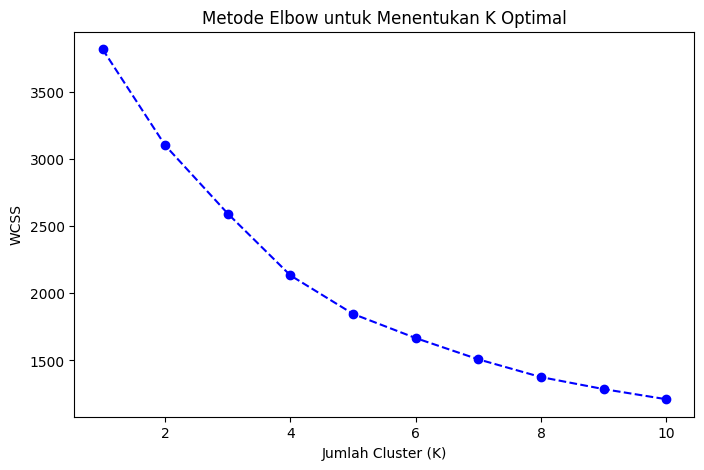

In [29]:
from sklearn.cluster import KMeans

# Menentukan variasi jumlah cluster
wcss = []
K_range = range(1, 11)  # Mengevaluasi K dari 1 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS (Within-Cluster Sum of Squares)

# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("WCSS")
plt.title("Metode Elbow untuk Menentukan K Optimal")
plt.show()

b. Menerapkan K-Means dengan K Optimal

In [30]:
# Gunakan jumlah cluster berdasarkan hasil Elbow (misalnya K=3)
optimal_k = 3  # Sesuaikan dengan hasil elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Tampilkan hasil cluster
print(df_scaled['Cluster_KMeans'].value_counts())

Cluster_KMeans
1    253
2    183
0    109
Name: count, dtype: int64


c. Visualisasi Cluster dengan PCA (jika lebih dari 2 fitur)

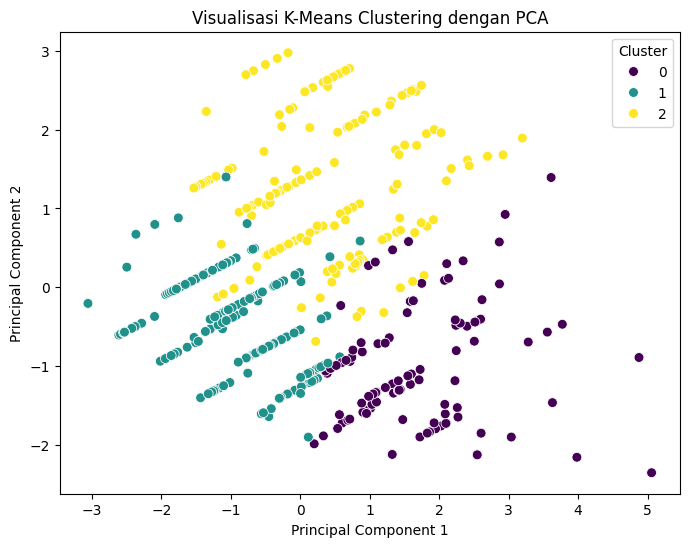

In [31]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster_KMeans']))

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_scaled['Cluster_KMeans']

# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi K-Means Clustering dengan PCA")
plt.legend(title="Cluster")
plt.show()

**8. Hierarchical Clustering**

a. Membuat Dendrogram untuk Menentukan Jumlah Cluster

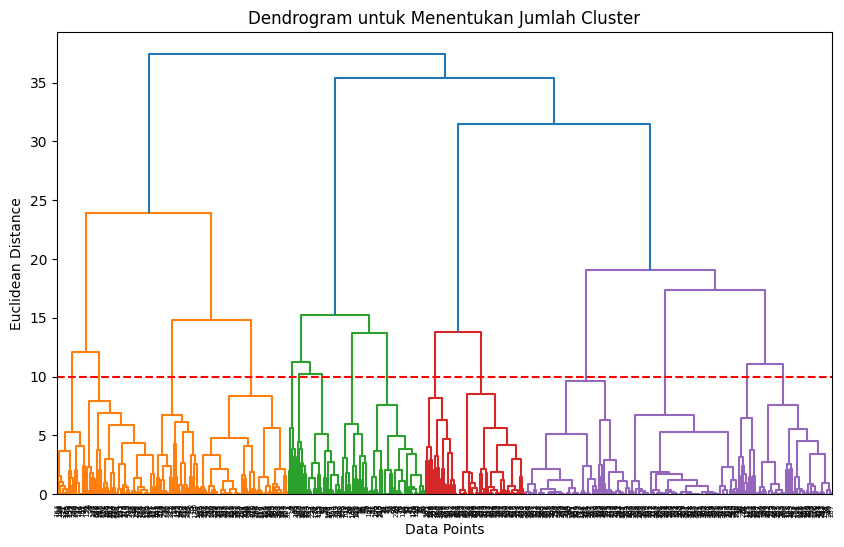

In [32]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')  # Sesuaikan threshold pemotongan jika perlu
plt.title("Dendrogram untuk Menentukan Jumlah Cluster")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

b. Menerapkan Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

optimal_clusters = 3  # Sesuaikan dengan hasil dendrogram

agglo = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
df_scaled['Cluster_Hierarchical'] = agglo.fit_predict(df_scaled)

# Tampilkan hasil cluster
print(df_scaled['Cluster_Hierarchical'].value_counts())

Cluster_Hierarchical
0    286
1    163
2     96
Name: count, dtype: int64


c. Visualisasi Hasil Clustering dengan PCA

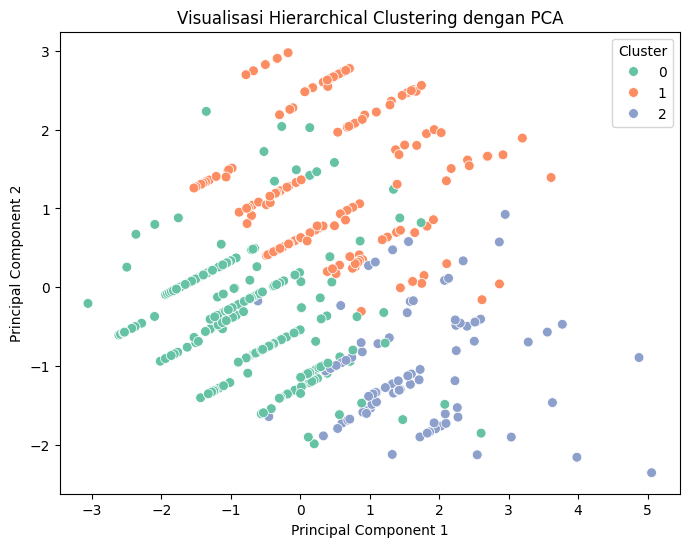

In [34]:
df_pca['Cluster_Hierarchical'] = df_scaled['Cluster_Hierarchical']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster_Hierarchical'], palette='Set2', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Hierarchical Clustering dengan PCA")
plt.legend(title="Cluster")
plt.show()

**9. DBSCAN Clustering**

a. Menerapkan DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

# Menentukan model DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Melihat hasil clustering
print(df_scaled['Cluster_DBSCAN'].value_counts())

Cluster_DBSCAN
 5     204
 3      66
-1      58
 0      53
 9      46
 1      45
 6      24
 4      18
 2      13
 7       7
 10      6
 8       5
Name: count, dtype: int64


b. Visualisasi Hasil Clustering dengan PCA

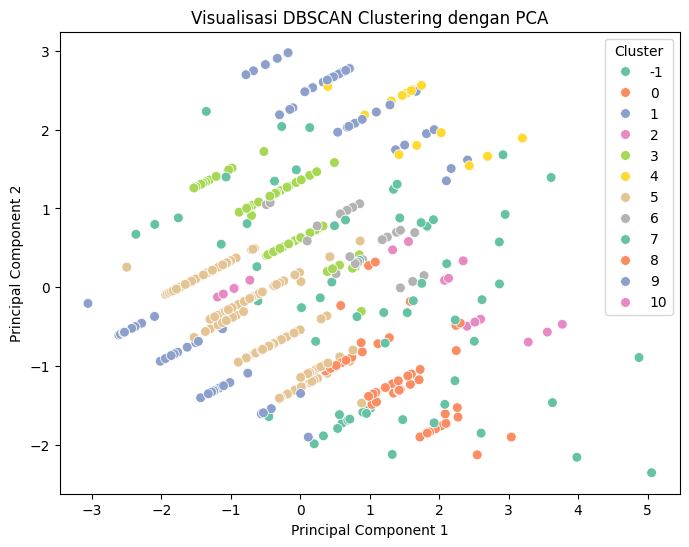

In [36]:
df_pca['Cluster_DBSCAN'] = df_scaled['Cluster_DBSCAN']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster_DBSCAN'], palette='Set2', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi DBSCAN Clustering dengan PCA")
plt.legend(title="Cluster")
plt.show()

**10. Evaluasi Hasil Clustering**

a. Evaluasi K-Means

In [37]:
silhouette_kmeans = silhouette_score(df_scaled, df_scaled['Cluster_KMeans'])
print(f"Silhouette Score untuk K-Means: {silhouette_kmeans:.4f}")

Silhouette Score untuk K-Means: 0.3016


b. Evaluasi Hierarchical Clustering

In [38]:
silhouette_hierarchical = silhouette_score(df_scaled, df_scaled['Cluster_Hierarchical'])
print(f"Silhouette Score untuk Hierarchical Clustering: {silhouette_hierarchical:.4f}")

Silhouette Score untuk Hierarchical Clustering: 0.2690


c. Evaluasi DBSCAN

In [39]:
df_dbscan_filtered = df_scaled[df_scaled['Cluster_DBSCAN'] != -1]
if len(df_dbscan_filtered) > 0:
    silhouette_dbscan = silhouette_score(df_dbscan_filtered, df_dbscan_filtered['Cluster_DBSCAN'])
    print(f"Silhouette Score untuk DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN menghasilkan semua titik sebagai noise/outlier!")

Silhouette Score untuk DBSCAN: 0.5203


**11. Analisis Hasil Clustering**

1.  K-Means	0.3016
2.  Hierarchical	0.2690
3.  DBSCAN	0.5203

**Interpretasi Hasil**

* DBSCAN memiliki skor tertinggi (0.5203), yang menunjukkan bahwa metode ini lebih baik dalam memisahkan cluster dengan pola non-linier.
* K-Means (0.3016) masih cukup baik, tetapi kurang optimal dibanding DBSCAN.
* Hierarchical (0.2690) memiliki skor terendah, yang berarti cluster yang terbentuk mungkin kurang terpisah dengan baik atau dataset ini kurang cocok untuk pendekatan hierarki.